# Chargement des librairies et paramétrage du Notebook

#### Coded by Meryem

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as ss

# We will display plots right inside Jupyter Notebook
%matplotlib inline
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Increase the default plot size
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

# Chargement des données

In [5]:
data = pd.read_csv("data_year1.csv")
print(np.unique(data['IDCNT']).shape)
print(data.shape)
data = data.drop("IDCNT", 1)

(34065,)
(34065, 25)


In [6]:
data.head()

RISK_NATURE_1 RISK_NATURE_2  RISK_NATURE_3  RISK_FAMILY_STRUCT  \
0            PH            HO              1                   4   
1            PH            HT              2                   3   
2            PH            FO              5                   3   
3            PH            HT              2                   2   
4            PH            HO              1                   4   

   RISK_ROOMS_NB  RISK_PROT_1  RISK_PROT_2  SURF_HOUSE  SURF_VER  SURF_OUTB  \
0             10            1            1          17         0          0   
1              5            1            1          10         0          0   
2              3            4            0           6         0          0   
3              2            4            0           3         0          1   
4              4            4            0           8         0          1   

   ...    OPTION_4  OPTION_5  OPTION_6  OPTION_7  OPTION_8  INSEE_CODE  \
0  ...       False     False     False     False     False       31555   
1  ...       False     False     False     False     False       26096   
2  ...       False     False     False     False     False       69276   
3  ...       False     False     False     False     False       35278   
4  ...       False     False     False      True      True       44090   

   ZONE_1  ZONE_2  ZONE_3 AMOUNT  
0       Q       P       K    0.0  
1       J       H       H    0.0  
2       M       P       E    0.0  
3       F       F       C    0.0  
4       C       C       E    0.0  

[5 rows x 24 columns]

In [7]:
data.columns.values

array(['RISK_NATURE_1', 'RISK_NATURE_2', 'RISK_NATURE_3',
       'RISK_FAMILY_STRUCT', 'RISK_ROOMS_NB', 'RISK_PROT_1', 'RISK_PROT_2',
       'SURF_HOUSE', 'SURF_VER', 'SURF_OUTB', 'SURF_GR', 'OPTION_1',
       'OPTION_2', 'OPTION_3', 'OPTION_4', 'OPTION_5', 'OPTION_6',
       'OPTION_7', 'OPTION_8', 'INSEE_CODE', 'ZONE_1', 'ZONE_2', 'ZONE_3',
       'AMOUNT'], dtype=object)

In [8]:
data.dtypes

RISK_NATURE_1          object
RISK_NATURE_2          object
RISK_NATURE_3           int64
RISK_FAMILY_STRUCT      int64
RISK_ROOMS_NB           int64
RISK_PROT_1             int64
RISK_PROT_2             int64
SURF_HOUSE              int64
SURF_VER                int64
SURF_OUTB               int64
SURF_GR                 int64
OPTION_1                 bool
OPTION_2                 bool
OPTION_3                 bool
OPTION_4                 bool
OPTION_5                 bool
OPTION_6                 bool
OPTION_7                 bool
OPTION_8                 bool
INSEE_CODE             object
ZONE_1                 object
ZONE_2                 object
ZONE_3                 object
AMOUNT                float64
dtype: object

# Type des variables

Dans cette section on subdivise les variables selon leur type. D'après le descriptif des données, il n'y a pas ou peu de données numériques. L'essentiel des données est soit catégoriel soit catégoriel et ordonné (ie ordinal). Le cas binaire étant un cas particulier des variables catégorielles. La cible est numérique.

In [9]:
variables_binaires = data.columns.values[data.dtypes=="bool"]
variables_ordinales = data.columns.values[data.dtypes=="int64"]
variables_categorielles = data.columns.values[data.dtypes=="object"]
cible = "AMOUNT"

In [10]:
print("Liste des variables binaires : \n")
print(variables_binaires)
print("\nListe des variables catégorielles : \n")
print(variables_categorielles)
print("\nListe des variables ordinales : \n")
print(variables_ordinales)
print("\nCible : \n")
print(cible)

Liste des variables binaires : 

['OPTION_1' 'OPTION_2' 'OPTION_3' 'OPTION_4' 'OPTION_5' 'OPTION_6'
 'OPTION_7' 'OPTION_8']

Liste des variables catégorielles : 

['RISK_NATURE_1' 'RISK_NATURE_2' 'INSEE_CODE' 'ZONE_1' 'ZONE_2' 'ZONE_3']

Liste des variables ordinales : 

['RISK_NATURE_3' 'RISK_FAMILY_STRUCT' 'RISK_ROOMS_NB' 'RISK_PROT_1'
 'RISK_PROT_2' 'SURF_HOUSE' 'SURF_VER' 'SURF_OUTB' 'SURF_GR']

Cible : 

AMOUNT


# Analyse univariée

Pour les variables binaires, catégorielles et ordinales, on regarde la distribution de ces variables indépendemment de leur impact sur la variable cible.

## Variable numérique (cible)

Pour la variable cible, il y a assez peu de montants observés strictement positifs. Pour pouvoir visualiser quelque chose, on retire les 0 (observations majoritaires). Il semble que l'essentiel des sinistres soient concentrés entre 0 et 2500 euros. Il y a quelques valeurs extrêmes qu'il faudra probablement traiter par la suite.

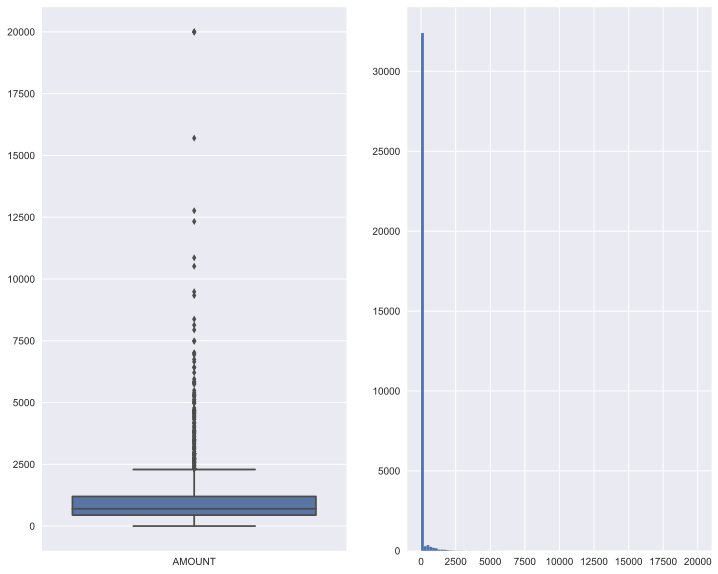

In [11]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))

# Suppression des 0
tmp = data[cible]
tmp = tmp[tmp!=0]
tmp = pd.DataFrame(tmp, columns=['AMOUNT'])


sns.boxplot(data=tmp, ax=axes[0]);
data[cible].hist(bins = 100, ax=axes[1]);

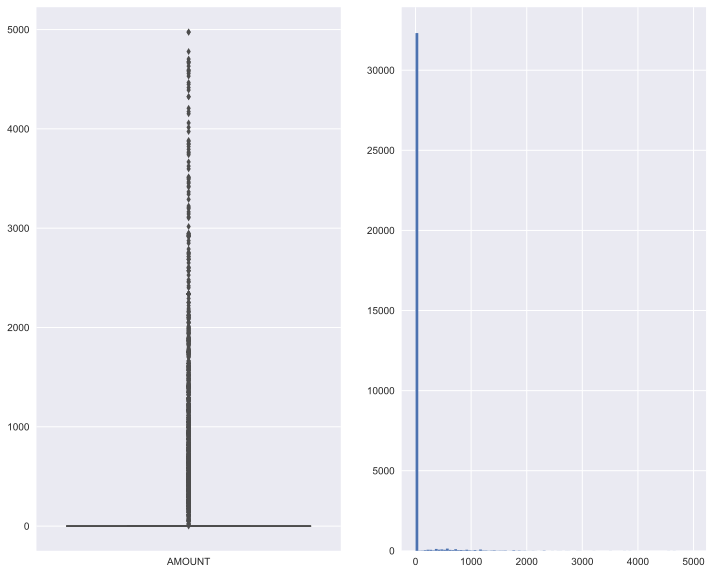

In [12]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))

# Suppression des 0
tmp = data[cible]
tmp = tmp[tmp<5000]
tmp = pd.DataFrame(tmp, columns=['AMOUNT'])


sns.boxplot(data=tmp, ax=axes[0]);
tmp[cible].hist(bins = 100, ax=axes[1]);

## Variables binaires

Les options 1 à 5 ont été très peu choisies par les assurés. La suite de l'analyse devrait permettre de déterminer si elles ont un pouvoir discriminant ou non mais a priori elles seront peu pertinentes dans l'analyse.

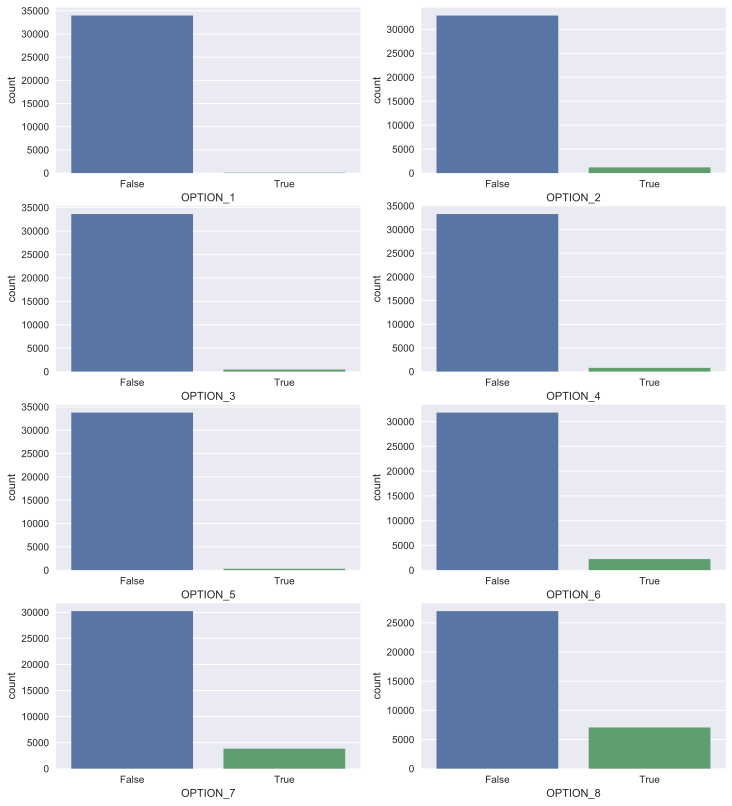

In [13]:
_, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))

for idx, feat in enumerate(variables_binaires):
        sns.countplot(x=feat, data=data, ax=axes[int(idx / 2), idx % 2])

## Variables catégorielles

La variable "RISK_NATURE_1" montre deux classes très déséquilibrées. Cependant, le reste des variables catégorielles est bien réparti.

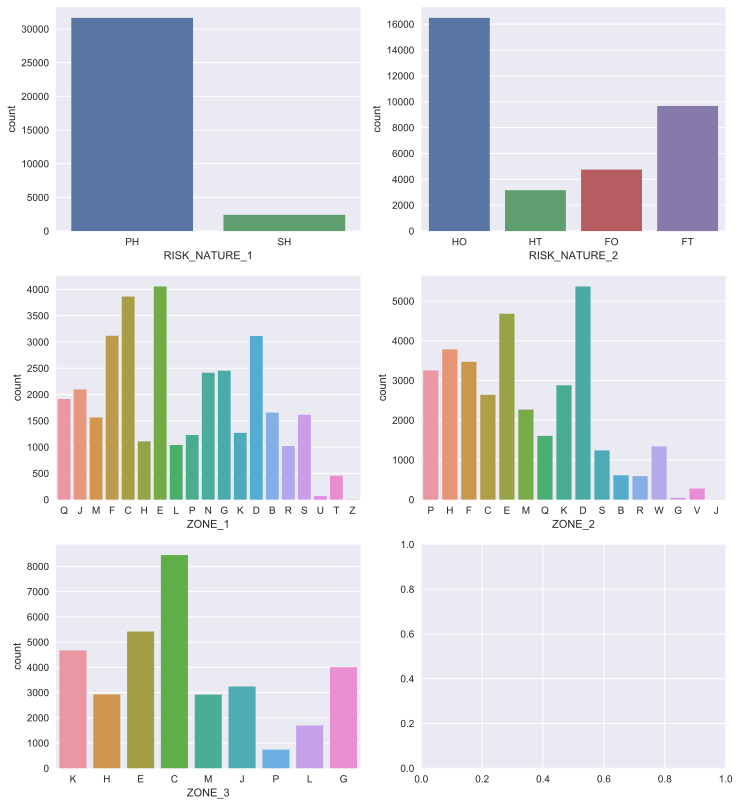

In [14]:
_, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 14))

# On ne représente pas le code INSEE car il y a trop de modalités

for idx, feat in enumerate(variables_categorielles[variables_categorielles!="INSEE_CODE"]):
        sns.countplot(x=feat, data=data, ax=axes[int(idx / 2), idx % 2])

## Variables ordinales

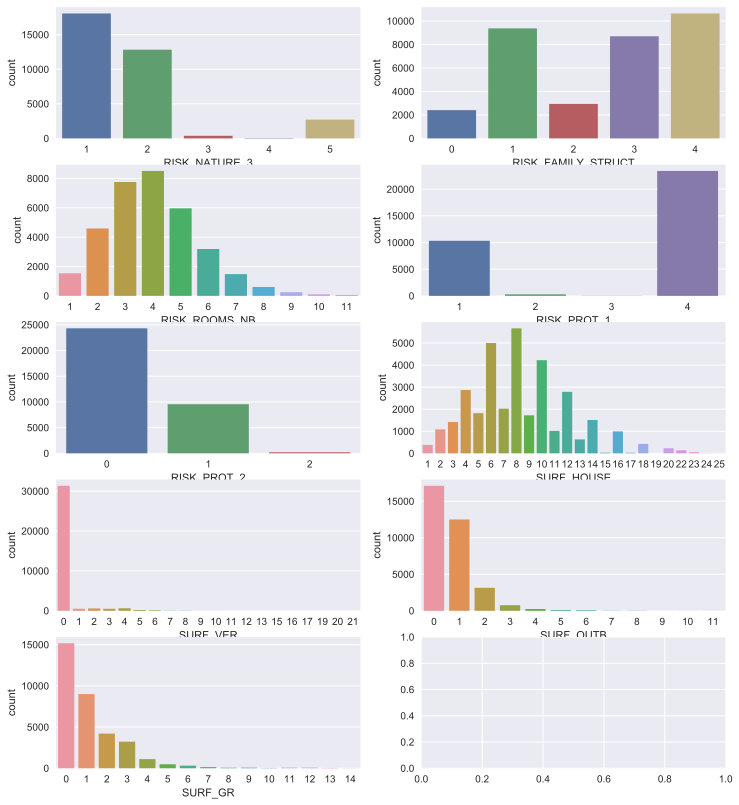

In [15]:
_, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 14))

for idx, feat in enumerate(variables_ordinales):
    sns.countplot(x=feat, data=data, ax=axes[int(idx / 2), idx % 2])

# Analyse bi-variée

Les barplot représentent le montant moyen par modalité. La barre noire verticale est une sorte d'intervalle de confiance. Lien vers le site de seaborn pour plus d'explications : https://seaborn.pydata.org/generated/seaborn.barplot.html. A priori, ces variables seront peu informatives.

## Variables binaires

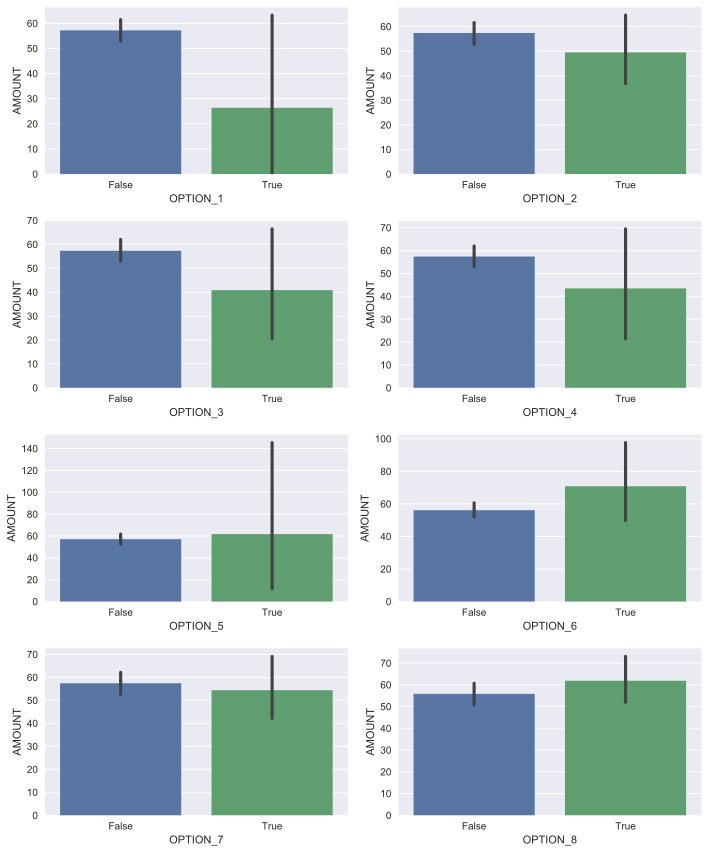

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))

for idx, feat in enumerate(variables_binaires): 
    ax = axes[int(idx / 2), idx % 2] 
    sns.barplot(x=feat, y='AMOUNT', data=data, ax=ax) 
    ax.set_xlabel(feat) 
    ax.set_ylabel('AMOUNT') 
fig.tight_layout();

## Variables catégorielles

Les variables de nature de risque ont un intérêt d'après ce que l'on peut voir sur les graphiques. Les variables de zones sont intéressantes mais un peu moins que la nature du risque.

In [17]:
def order_cat(target, variable):
    res = data[[target, variable]].groupby([variable]).mean().sort_values(by=[target])
    return res.index.values
    
order_cat(cible, variables_categorielles[0])

array(['SH', 'PH'], dtype=object)

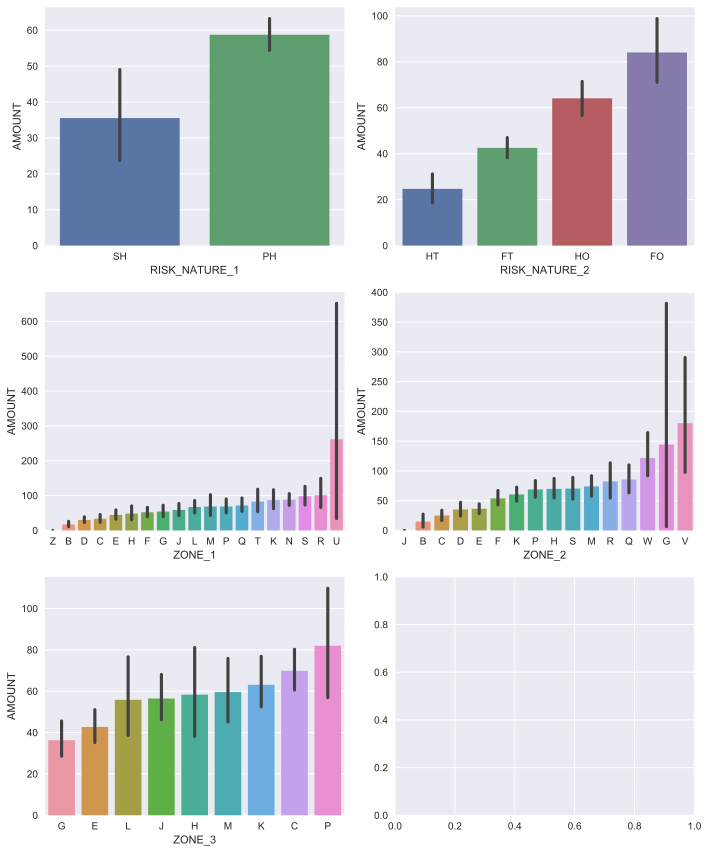

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

# On ne représente pas INSEE_CODE

for idx, feat in enumerate(variables_categorielles[variables_categorielles!="INSEE_CODE"]): 
    ax = axes[int(idx / 2), idx % 2] 
    sns.barplot(x=feat, y='AMOUNT', order=order_cat(cible, variables_categorielles[variables_categorielles!="INSEE_CODE"][idx]), data=data, ax=ax) 
    ax.set_xlabel(feat) 
    ax.set_ylabel('AMOUNT') 
fig.tight_layout();

## Variables ordinales

Pour les variables ordinales, on ne réordonne pas les modalité car elles sont censées être ordonnées (la surface de véranda 11 est plus petite que la surface 12). On constate qu'il y a une relation quasiment monotone entre le nombre de chambres sous risque et le montant du sinistre. Malheureusement pour les modalités 8 à 11 il y a une grosse incertitude sur l'estimation (car peu d'observations).

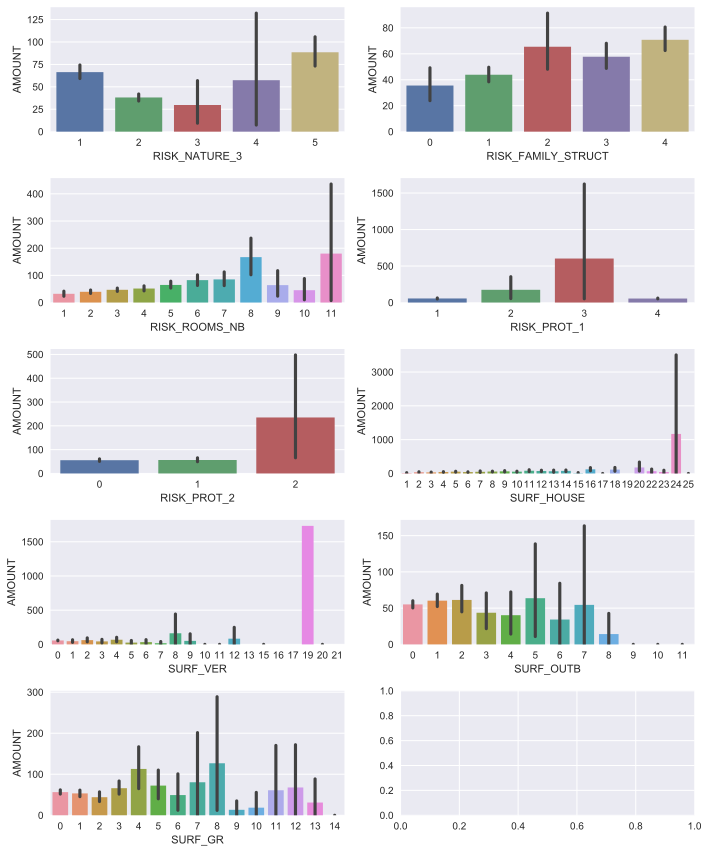

In [19]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 12))

for idx, feat in enumerate(variables_ordinales): 
    ax = axes[int(idx / 2), idx % 2] 
    sns.barplot(x=feat, y='AMOUNT', data=data, ax=ax) 
    ax.set_xlabel(feat) 
    ax.set_ylabel('AMOUNT') 
fig.tight_layout();

# Liaison entre la cible et les prédicteurs

**A compléter**

A faire, proposer une mesure du lien entre la variable cible qui est numérique et les prédicteurs. Cela permettra de vérifier lesquels sont les plus discriminants. 

def cramers_stat(contingency_matrix):
    chi2 = ss.chi2_contingency(contingency_matrix)[0]
    n = np.sum(contingency_matrix.sum())
    return np.sqrt(chi2 / (n*(min(contingency_matrix.shape)-1)))

cont_mat = pd.crosstab(data['RISK_NATURE_1'], data['ZONE_2']) 

#result = cramers_stat(cont_mat)

all_variables = np.concatenate((variables_categorielles[variables_categorielles!="INSEE_CODE"],
                                variables_binaires,
                                variables_ordinales))

n = all_variables.shape[0]
matrice_corr = np.zeros((n, n))

for i in range(all_variables.shape[0]):
    for j in range(i, all_variables.shape[0]):
        cont_mat = pd.crosstab(data.iloc[:, i], data.iloc[:, j]) 
        matrice_corr[i, j] = cramers_stat(cont_mat)
        
matrice_corr = pd.DataFrame(matrice_corr,
                            columns=all_variables,
                            index=all_variables)
#print(matrice_corr)

mask = np.zeros_like(matrice_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(np.transpose(matrice_corr), 
            xticklabels=matrice_corr.columns.values,
            yticklabels=matrice_corr.columns.values,
            cmap="RdYlGn",
            mask=mask)

# Liaisons entre les prédicteurs

Ci-dessous sont calculés les V de Cramer (une mesure de liaison entre variables catégorielles). C'est une première mesure, mais il est possible d'en trouver d'autres, notamment pour les variables ordinales. 

def cramers_stat(contingency_matrix):
    chi2 = ss.chi2_contingency(contingency_matrix)[0]
    n = np.sum(contingency_matrix.sum())
    return np.sqrt(chi2 / (n*(min(contingency_matrix.shape)-1)))

cont_mat = pd.crosstab(data['RISK_NATURE_1'], data['ZONE_2']) 

#result = cramers_stat(cont_mat)

all_variables = np.concatenate((variables_categorielles[variables_categorielles!="INSEE_CODE"],
                                variables_binaires,
                                variables_ordinales))

n = all_variables.shape[0]
matrice_corr = np.zeros((n, n))

for i in range(all_variables.shape[0]):
    for j in range(i, all_variables.shape[0]):
        cont_mat = pd.crosstab(data.iloc[:, i], data.iloc[:, j]) 
        matrice_corr[i, j] = cramers_stat(cont_mat)
        
matrice_corr = pd.DataFrame(matrice_corr,
                            columns=all_variables,
                            index=all_variables)
#print(matrice_corr)

mask = np.zeros_like(matrice_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(np.transpose(matrice_corr), 
            xticklabels=matrice_corr.columns.values,
            yticklabels=matrice_corr.columns.values,
            cmap="RdYlGn",
            mask=mask)

# Nettoyage des données

**A compléter**

Cette section a pour but de nettoyer les données si besoin. Détecter et traiter les NA, valeurs aberrantes etc.

In [19]:
data.isna().apply(np.sum, axis=0)

Apparemment, il n'y a pas de variables manquantes. Dans le dictionnaire de variables, il ne semble pas non plus y avoir de code particulier pour les valeurs manquantes. On peut supposer que le jeu de données a déjà été reconstruit pour nous. A vérifier. Il reste à traiter les valeurs aberrantes. Ces dernières peuvent avoir un impact significatif lors de l'estimation des paramètres de la régression.

# Sélection des variables

**A compléter**

Des prédicteurs trop corrélés peuvent dégrader les prédictions. Il est nécessaire de supprimer/traiter les prédicteurs trop corrélés entre eux. Pour les variables catégorielles il faudra probablement binariser et vérifier après binarisation que les nouveaux prédicteurs ne sont pas trop corrélés.

In [20]:
def corr_heatmap(v):
    correlations = data[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
 

In [21]:
variables_binaires = data.columns.values[data.dtypes=="bool"]
variables_ordinales = data.columns.values[data.dtypes=="int64"]
variables_categorielles = data.columns.values[data.dtypes=="object"]

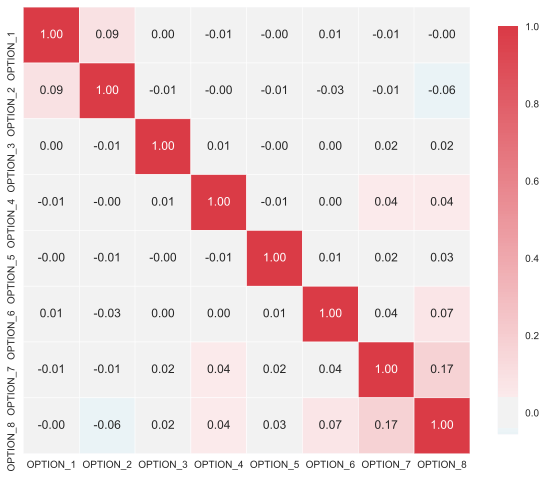

In [22]:
corr_heatmap(variables_binaires)

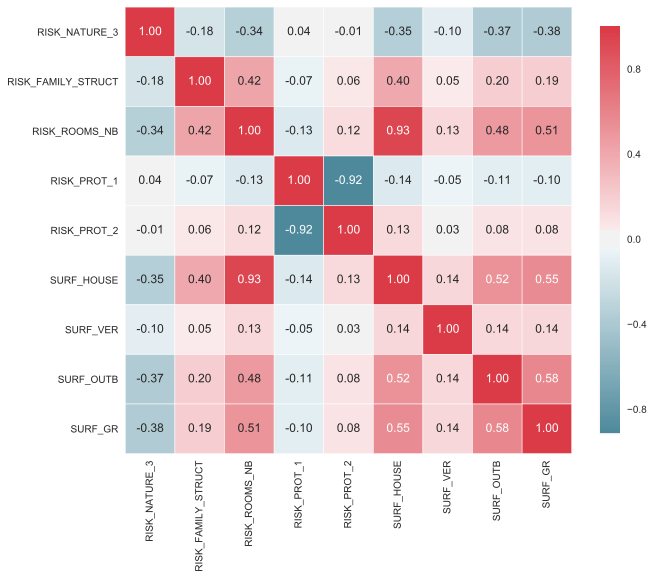

In [23]:
corr_heatmap(variables_ordinales )

Il existe une correlation negative entre risk_prot_1 et risk_prot_2. 
Il existe une correlation positive entre risk_rooms_nb et surf_house

# Création de variables

**A compléter**

Il y a assez peu de marge pour la création de variables puisqu'elles sont toutes catégorielles ou presque. Peut-être que l'on peut retravailler dans une certaine mesure les surfaces, mais rien ne permet d'affirmer que ce sera pertinent. Les surfaces ne sont pas en m²... En revanche, il est possible d'ajouter des variables externes grâce au code INSEE

* Densité de population

* Revenu moyen/median etc 

* Un indicateur météo/inondations (on ne sait pas en quoi consiste la garantie donc on peut essayer)

* Indice du nombre de cambriolages sur la population

* Toutes vos idées sont les bienvenues...

In [25]:
#au niveau  de code d'insee
insee = pd.read_csv("insee_commune_V3.csv",sep=',',encoding = "ISO-8859-1", low_memory=False)
insee.head(10)

codgeo      POP   MEDREV  TAUXPAUV  MAISON  APPART  SALMOY  taux_chom  \
0   1001    777.0  22253.0       NaN   319.0    16.0     NaN        8.5   
1   1002    235.0  21766.0       NaN   159.0     1.0     NaN        7.5   
2   1004  14233.0  19237.0      15.0  3339.0  3263.0    12.9       14.0   
3   1005   1642.0  21744.0       NaN   525.0   122.0     NaN        6.0   
4   1006    110.0  20354.0       NaN    58.0    12.0     NaN        3.5   
5   1007   2437.0  21333.0       7.0   971.0   152.0    12.9        8.5   
6   1008    739.0  22784.0       NaN   300.0    32.0     NaN        7.5   
7   1009    338.0  20916.0       NaN   163.0    13.0     NaN        7.5   
8   1010   1069.0  20284.0       NaN   502.0    73.0     NaN       12.0   
9   1011    385.0  21944.0       NaN   151.0    35.0     NaN       10.5   

   taux_marie  taux_celib        ...         pop_imm_07   pop_07  taux_ouv_07  \
0        59.0        29.0        ...               20.0    804.0         19.0   
1        53.0        36.0        ...                3.0    195.0         16.0   
2        47.0        36.0        ...             1242.0  12696.0         20.0   
3        54.0        33.0        ...               61.0   1544.0         23.0   
4        53.0        31.0        ...                1.0    125.0         22.0   
5        53.0        34.0        ...              114.0   2263.0         15.0   
6        51.0        36.0        ...               24.0    649.0         25.0   
7        58.0        27.0        ...                9.0    325.0          9.0   
8        52.0        33.0        ...               43.0    918.0         16.0   
9        54.0        34.0        ...                8.0    333.0         20.0   

   taux_fr_07  taux_etr_07  taux_imm_07  DEC_ECARTIQ  DISP_ECARTIQ  \
0        98.0          2.0          2.0          NaN           NaN   
1        99.0          1.0          2.0          NaN           NaN   
2        91.0          9.0         10.0      14088.0       11425.0   
3        98.0          2.0          4.0          NaN           NaN   
4        99.0          1.0          1.0          NaN           NaN   
5        97.0          3.0          5.0      11570.0        9971.0   
6        98.0          2.0          4.0          NaN           NaN   
7        98.0          2.0          3.0          NaN           NaN   
8        97.0          3.0          5.0          NaN           NaN   
9        99.0          1.0          2.0          NaN           NaN   

   DEC_ECARTIQ_grp  DISP_ECARTIQ_grp  
0              NaN               NaN  
1              NaN               NaN  
2          14000.0           11500.0  
3              NaN               NaN  
4              NaN               NaN  
5          11500.0           10000.0  
6              NaN               NaN  
7              NaN               NaN  
8              NaN               NaN  
9              NaN               NaN  

[10 rows x 27 columns]

In [26]:
insee['coddep']=insee.codgeo.str[0:2]
insee.head(10)

codgeo      POP   MEDREV  TAUXPAUV  MAISON  APPART  SALMOY  taux_chom  \
0   1001    777.0  22253.0       NaN   319.0    16.0     NaN        8.5   
1   1002    235.0  21766.0       NaN   159.0     1.0     NaN        7.5   
2   1004  14233.0  19237.0      15.0  3339.0  3263.0    12.9       14.0   
3   1005   1642.0  21744.0       NaN   525.0   122.0     NaN        6.0   
4   1006    110.0  20354.0       NaN    58.0    12.0     NaN        3.5   
5   1007   2437.0  21333.0       7.0   971.0   152.0    12.9        8.5   
6   1008    739.0  22784.0       NaN   300.0    32.0     NaN        7.5   
7   1009    338.0  20916.0       NaN   163.0    13.0     NaN        7.5   
8   1010   1069.0  20284.0       NaN   502.0    73.0     NaN       12.0   
9   1011    385.0  21944.0       NaN   151.0    35.0     NaN       10.5   

   taux_marie  taux_celib   ...     pop_07  taux_ouv_07  taux_fr_07  \
0        59.0        29.0   ...      804.0         19.0        98.0   
1        53.0        36.0   ...      195.0         16.0        99.0   
2        47.0        36.0   ...    12696.0         20.0        91.0   
3        54.0        33.0   ...     1544.0         23.0        98.0   
4        53.0        31.0   ...      125.0         22.0        99.0   
5        53.0        34.0   ...     2263.0         15.0        97.0   
6        51.0        36.0   ...      649.0         25.0        98.0   
7        58.0        27.0   ...      325.0          9.0        98.0   
8        52.0        33.0   ...      918.0         16.0        97.0   
9        54.0        34.0   ...      333.0         20.0        99.0   

   taux_etr_07  taux_imm_07  DEC_ECARTIQ  DISP_ECARTIQ  DEC_ECARTIQ_grp  \
0          2.0          2.0          NaN           NaN              NaN   
1          1.0          2.0          NaN           NaN              NaN   
2          9.0         10.0      14088.0       11425.0          14000.0   
3          2.0          4.0          NaN           NaN              NaN   
4          1.0          1.0          NaN           NaN              NaN   
5          3.0          5.0      11570.0        9971.0          11500.0   
6          2.0          4.0          NaN           NaN              NaN   
7          2.0          3.0          NaN           NaN              NaN   
8          3.0          5.0          NaN           NaN              NaN   
9          1.0          2.0          NaN           NaN              NaN   

   DISP_ECARTIQ_grp  coddep  
0               NaN      10  
1               NaN      10  
2           11500.0      10  
3               NaN      10  
4               NaN      10  
5           10000.0      10  
6               NaN      10  
7               NaN      10  
8               NaN      10  
9               NaN      10  

[10 rows x 28 columns]

In [27]:
insee.info(verbose =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36689 entries, 0 to 36688
Data columns (total 28 columns):
codgeo              36689 non-null object
POP                 36664 non-null float64
MEDREV              32887 non-null float64
TAUXPAUV            5072 non-null float64
MAISON              36664 non-null float64
APPART              36664 non-null float64
SALMOY              5046 non-null float64
taux_chom           36655 non-null float64
taux_marie          36658 non-null float64
taux_celib          36658 non-null float64
taux_divor          36658 non-null float64
taux_maison         36659 non-null float64
taux_appart         36659 non-null float64
pop_grp             36664 non-null float64
medrev_grp          32887 non-null float64
pop_fr_07           36560 non-null float64
pop_etr_07          36560 non-null float64
pop_imm_07          36560 non-null float64
pop_07              36560 non-null float64
taux_ouv_07         36557 non-null float64
taux_fr_07          36560 non-null

In [28]:
df1 = pd.merge(data, insee, how = 'left', left_on = 'INSEE_CODE', right_on = 'codgeo')
df1.head(10) 

RISK_NATURE_1 RISK_NATURE_2  RISK_NATURE_3  RISK_FAMILY_STRUCT  \
0            PH            HO              1                   4   
1            PH            HT              2                   3   
2            PH            FO              5                   3   
3            PH            HT              2                   2   
4            PH            HO              1                   4   
5            PH            HO              1                   3   
6            PH            HO              1                   3   
7            PH            HO              1                   1   
8            PH            HO              1                   3   
9            PH            FO              5                   1   

   RISK_ROOMS_NB  RISK_PROT_1  RISK_PROT_2  SURF_HOUSE  SURF_VER  SURF_OUTB  \
0             10            1            1          17         0          0   
1              5            1            1          10         0          0   
2              3            4            0           6         0          0   
3              2            4            0           3         0          1   
4              4            4            0           8         0          1   
5              4            4            0          10         0          5   
6              2            4            0           4         0          1   
7              5            4            0          10         5          1   
8              5            1            1           9         3          1   
9              2            4            0           4         0          0   

   ...      pop_07  taux_ouv_07  taux_fr_07  taux_etr_07  taux_imm_07  \
0  ...    439455.0          9.0        91.0          9.0         13.0   
1  ...      2017.0         20.0        98.0          2.0          3.0   
2  ...      9357.0         20.0        92.0          8.0         13.0   
3  ...      8225.0          6.0        99.0          1.0          2.0   
4  ...      1345.0         28.0       100.0          0.0          1.0   
5  ...     13144.0         20.0        97.0          3.0          5.0   
6  ...    109627.0         10.0        96.0          4.0          5.0   
7  ...     57852.0         10.0        96.0          4.0          6.0   
8  ...     50615.0         16.0        96.0          4.0          5.0   
9  ...         NaN          NaN         NaN          NaN          NaN   

   DEC_ECARTIQ  DISP_ECARTIQ  DEC_ECARTIQ_grp  DISP_ECARTIQ_grp coddep  
0      19076.0       15279.0          19000.0           15500.0     31  
1      12294.0       10111.0          12500.0           10000.0     26  
2      13080.0       10686.0          13000.0           10500.0     69  
3      19388.0       17047.0          19500.0           17000.0     35  
4          NaN           NaN              NaN               NaN     44  
5      12054.0        8668.0          12000.0            8500.0     59  
6      16924.0       13167.0          17000.0           13000.0     14  
7      16516.0       14001.0          16500.0           14000.0     33  
8      14430.0       11382.0          14500.0           11500.0     53  
9          NaN           NaN              NaN               NaN    NaN  

[10 rows x 52 columns]

In [29]:
df1.info(verbose =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34065 entries, 0 to 34064
Data columns (total 52 columns):
RISK_NATURE_1         34065 non-null object
RISK_NATURE_2         34065 non-null object
RISK_NATURE_3         34065 non-null int64
RISK_FAMILY_STRUCT    34065 non-null int64
RISK_ROOMS_NB         34065 non-null int64
RISK_PROT_1           34065 non-null int64
RISK_PROT_2           34065 non-null int64
SURF_HOUSE            34065 non-null int64
SURF_VER              34065 non-null int64
SURF_OUTB             34065 non-null int64
SURF_GR               34065 non-null int64
OPTION_1              34065 non-null bool
OPTION_2              34065 non-null bool
OPTION_3              34065 non-null bool
OPTION_4              34065 non-null bool
OPTION_5              34065 non-null bool
OPTION_6              34065 non-null bool
OPTION_7              34065 non-null bool
OPTION_8              34065 non-null bool
INSEE_CODE            34065 non-null object
ZONE_1                34065 non-null

In [31]:
#au niveau de departement 
crime2013 = pd.read_csv("crime2013_V3.csv",sep=',',encoding = "ISO-8859-1")
crime2013.head(10)

CODDEP                   NOMDEP  P12_POP  CRI_VOL_TOT   CRI_INC  CRI_FRAUD
0      1                      Ain   612193     0.002712  0.000109   0.000732
1      2                    Aisne   540883     0.006704  0.000355   0.001782
2      3                   Allier   342914     0.007818  0.000131   0.002604
3      4  Alpes-de-Haute-Provence   161241     0.006245  0.000149   0.001588
4      5             Hautes-Alpes   139555     0.006951  0.000165   0.001885
5      6          Alpes-Maritimes  1082016     0.027318  0.000301   0.004994
6      7                  Ardèche   318406     0.003621  0.000107   0.000747
7      8                 Ardennes   282778     0.005510  0.000555   0.001174
8      9                   Ariège   152365     0.003977  0.000085   0.001214
9     10                     Aube   305608     0.009489  0.000229   0.002454

In [32]:
crime2013.info(verbose =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
CODDEP         96 non-null object
NOMDEP         96 non-null object
P12_POP        96 non-null int64
CRI_VOL_TOT    96 non-null float64
CRI_INC        96 non-null float64
CRI_FRAUD      96 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.6+ KB


In [33]:
df2 = pd.merge(df1,crime2013,how = 'left', left_on='coddep', right_on ='CODDEP')
df2.head(5)  

RISK_NATURE_1 RISK_NATURE_2  RISK_NATURE_3  RISK_FAMILY_STRUCT  \
0            PH            HO              1                   4   
1            PH            HT              2                   3   
2            PH            FO              5                   3   
3            PH            HT              2                   2   
4            PH            HO              1                   4   

   RISK_ROOMS_NB  RISK_PROT_1  RISK_PROT_2  SURF_HOUSE  SURF_VER  SURF_OUTB  \
0             10            1            1          17         0          0   
1              5            1            1          10         0          0   
2              3            4            0           6         0          0   
3              2            4            0           3         0          1   
4              4            4            0           8         0          1   

     ...     DISP_ECARTIQ  DEC_ECARTIQ_grp  DISP_ECARTIQ_grp  coddep  CODDEP  \
0    ...          15279.0          19000.0           15500.0      31      31   
1    ...          10111.0          12500.0           10000.0      26      26   
2    ...          10686.0          13000.0           10500.0      69      69   
3    ...          17047.0          19500.0           17000.0      35      35   
4    ...              NaN              NaN               NaN      44      44   

             NOMDEP    P12_POP  CRI_VOL_TOT   CRI_INC CRI_FRAUD  
0     Haute-Garonne  1279354.0     0.018818  0.000414  0.003278  
1             Drôme   491335.0     0.010921  0.000580  0.002512  
2             Rhône  1762870.0     0.022573  0.000725  0.004583  
3   Ille-et-Vilaine  1007906.0     0.007842  0.000130  0.002095  
4  Loire-Atlantique  1313319.0     0.014728  0.000404  0.001881  

[5 rows x 58 columns]

In [34]:
df2.info(verbose =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34065 entries, 0 to 34064
Data columns (total 58 columns):
RISK_NATURE_1         34065 non-null object
RISK_NATURE_2         34065 non-null object
RISK_NATURE_3         34065 non-null int64
RISK_FAMILY_STRUCT    34065 non-null int64
RISK_ROOMS_NB         34065 non-null int64
RISK_PROT_1           34065 non-null int64
RISK_PROT_2           34065 non-null int64
SURF_HOUSE            34065 non-null int64
SURF_VER              34065 non-null int64
SURF_OUTB             34065 non-null int64
SURF_GR               34065 non-null int64
OPTION_1              34065 non-null bool
OPTION_2              34065 non-null bool
OPTION_3              34065 non-null bool
OPTION_4              34065 non-null bool
OPTION_5              34065 non-null bool
OPTION_6              34065 non-null bool
OPTION_7              34065 non-null bool
OPTION_8              34065 non-null bool
INSEE_CODE            34065 non-null object
ZONE_1                34065 non-null

In [37]:
#on remplace NAN avec -999 a la place de zero
numerique = [ c for c,d in zip(df2.columns,df2.dtypes) if d in ["float64"] and c not in ["AMOUNT"]]
num=df2[ numerique ]
num=num.fillna(-999)

In [38]:
vars_with_missing = []

for f in num.columns:
    missings = num[num[f] == -999][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/num.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable POP has 4350 records (12.77%) with missing values
Variable MEDREV has 4453 records (13.07%) with missing values
Variable TAUXPAUV has 11227 records (32.96%) with missing values
Variable MAISON has 4350 records (12.77%) with missing values
Variable APPART has 4350 records (12.77%) with missing values
Variable SALMOY has 11312 records (33.21%) with missing values
Variable taux_chom has 4350 records (12.77%) with missing values
Variable taux_marie has 4350 records (12.77%) with missing values
Variable taux_celib has 4350 records (12.77%) with missing values
Variable taux_divor has 4350 records (12.77%) with missing values
Variable taux_maison has 4350 records (12.77%) with missing values
Variable taux_appart has 4350 records (12.77%) with missing values
Variable pop_grp has 4350 records (12.77%) with missing values
Variable medrev_grp has 4453 records (13.07%) with missing values
Variable pop_fr_07 has 4335 records (12.73%) with missing values
Variable pop_etr_07 has 4335 records

In [39]:
variables_float = df2.columns.values[df2.dtypes=="float"]
variables_float

array(['AMOUNT', 'POP', 'MEDREV', 'TAUXPAUV', 'MAISON', 'APPART', 'SALMOY',
       'taux_chom', 'taux_marie', 'taux_celib', 'taux_divor',
       'taux_maison', 'taux_appart', 'pop_grp', 'medrev_grp', 'pop_fr_07',
       'pop_etr_07', 'pop_imm_07', 'pop_07', 'taux_ouv_07', 'taux_fr_07',
       'taux_etr_07', 'taux_imm_07', 'DEC_ECARTIQ', 'DISP_ECARTIQ',
       'DEC_ECARTIQ_grp', 'DISP_ECARTIQ_grp', 'P12_POP', 'CRI_VOL_TOT',
       'CRI_INC', 'CRI_FRAUD'], dtype=object)

In [41]:
#corr_heatmap(variables_float)

# Ajustement du modèle

**A compléter**

A ce stade, l'exploration est terminée. Il faudra probablement ajuster un GLM sur toutes les variables et sans pénalisation. Puis dans un second temps, les résultats pourront être affinés avec un GLM pénalisé (ridge, lasso...).